In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_stocks.csv')

In [3]:
data = data.drop(['DATE'], 1)

In [4]:
data

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2363.6101,42.3300,143.6800,129.6300,82.0400,102.2300,85.2200,59.7600,121.5200,38.9900,...,84.3700,119.0350,44.400,39.8800,82.0300,7.3600,50.2200,63.8600,122.0000,53.3500
1,2364.1001,42.3600,143.7000,130.3200,82.0800,102.1400,85.6500,59.8400,121.4800,39.0100,...,84.3700,119.0350,44.110,39.8800,82.0300,7.3800,50.2200,63.7400,121.7700,53.3500
2,2362.6799,42.3100,143.6901,130.2250,82.0300,102.2125,85.5100,59.7950,121.9300,38.9100,...,84.5850,119.2600,44.090,39.9800,82.0200,7.3600,50.1200,63.7500,121.7000,53.3650
3,2364.3101,42.3700,143.6400,130.0729,82.0000,102.1400,85.4872,59.6200,121.4400,38.8400,...,84.4600,119.2600,44.250,39.9900,82.0200,7.3500,50.1600,63.8800,121.7000,53.3800
4,2364.8501,42.5378,143.6600,129.8800,82.0350,102.0600,85.7001,59.6200,121.6000,38.9300,...,84.4700,119.6100,44.110,39.9600,82.0300,7.3600,50.2000,63.9100,121.6950,53.2400
5,2365.6201,42.5399,143.7800,130.0700,82.0400,102.0400,85.9200,59.6100,121.7000,38.9500,...,84.4825,119.5800,44.150,39.9600,82.0300,7.3600,50.2000,63.8400,121.8500,53.2200
6,2365.2000,42.4700,143.8640,130.1800,82.1200,102.3300,85.9120,59.5400,121.6300,38.9600,...,84.5000,119.3200,44.200,39.9800,82.0566,7.3650,50.3300,63.8300,122.1000,53.3300
7,2365.2900,42.4700,143.8100,130.1400,82.1900,102.3700,85.8200,59.4100,121.6100,38.9600,...,84.5200,119.1100,44.120,39.9500,82.0000,7.3600,50.3000,63.8300,122.2800,53.3700
8,2364.3201,42.3900,143.8150,130.1000,82.2300,102.3800,85.8800,59.4300,121.7150,38.9125,...,84.4800,119.3100,44.120,39.9300,81.9500,7.3700,50.2500,63.8500,121.8750,53.3300
9,2364.6399,42.3300,143.8000,130.2100,82.1650,102.3300,85.8600,59.2600,121.8500,38.8900,...,84.4000,119.1500,44.170,39.8600,81.9000,7.3650,50.2200,63.8400,121.9300,53.4000


In [5]:
n = data.shape[0]
p = data.shape[1]

In [6]:
data = data.values

In [7]:
data

array([[2363.6101,   42.33  ,  143.68  , ...,   63.86  ,  122.    ,
          53.35  ],
       [2364.1001,   42.36  ,  143.7   , ...,   63.74  ,  121.77  ,
          53.35  ],
       [2362.6799,   42.31  ,  143.6901, ...,   63.75  ,  121.7   ,
          53.365 ],
       ...,
       [2470.03  ,   44.74  ,  164.01  , ...,   76.88  ,  114.31  ,
          62.685 ],
       [2471.49  ,   44.71  ,  163.88  , ...,   76.83  ,  114.23  ,
          62.6301],
       [2471.49  ,   44.74  ,  163.98  , ...,   76.81  ,  114.28  ,
          62.68  ]])

In [8]:
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end + 1
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [9]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [10]:
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]


In [11]:
n_stocks = X_train.shape[1]

In [12]:
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128

In [13]:
net = tf.InteractiveSession()

In [14]:
X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [15]:
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [16]:
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

In [17]:
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

In [18]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

In [19]:
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [20]:
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [21]:
opt = tf.train.AdamOptimizer().minimize(mse)

In [22]:
net.run(tf.global_variables_initializer())

In [24]:
batch_size = 256
mse_train = []
mse_test = []

In [29]:
# Run
epochs = 3
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 25) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            #line2.set_ydata(pred)
            #plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            #file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            #plt.savefig(file_name)
            #plt.pause(0.01)
            print('Epoch ' + str(e) + ', Batch ' + str(i))
# Print final MSE after Training
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})
print(mse_final)


Epoch 0, Batch 0
Epoch 0, Batch 25
Epoch 0, Batch 50
Epoch 0, Batch 75
Epoch 0, Batch 100
Epoch 0, Batch 125
Epoch 1, Batch 0
Epoch 1, Batch 25
Epoch 1, Batch 50
Epoch 1, Batch 75
Epoch 1, Batch 100
Epoch 1, Batch 125
Epoch 2, Batch 0
Epoch 2, Batch 25
Epoch 2, Batch 50
Epoch 2, Batch 75
Epoch 2, Batch 100
Epoch 2, Batch 125
0.0014536973


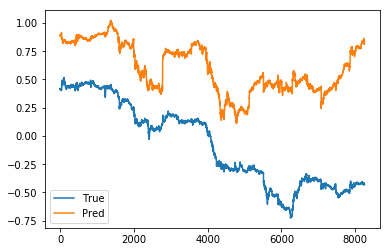

In [70]:
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(X_test[:,0], label='True')
line2, = ax1.plot(pred[0], label='Pred')
plt.legend()
plt.show()